In [92]:
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
import astropy.units as u
from collections import Counter
import numpy as np

In [93]:
from astropy.io import fits

In [94]:
# get the ACES beam.
# look for matches within the ACES's beam at ACES catalog locations.

In [95]:
from radio_beam import Beam
from astropy.table import Table

In [96]:
aces_path = '/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/12m_continuum_commonbeam_circular_reimaged_mosaic.fits'
hdr_aces = fits.getheader(aces_path)
beam_aces = Beam.from_fits_header(hdr_aces)  

In [97]:
B1_off = Table.read('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/dbcat/SgrB1off.dbcat_originalbeam_publish.txt', format='ascii')
Sgr_C = Table.read('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/dbcat/SgrC.dbcat_originalbeam_publish.txt', format='ascii')
kms20 = Table.read('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/dbcat/The20kmsCloud.dbcat_originalbeam_publish.txt', format='ascii')

In [98]:
B1_off_coords = SkyCoord(ra=B1_off['RA(hms)'], dec=B1_off['DEC(dms)'], unit=(u.hourangle, u.deg))
Sgr_C_coords = SkyCoord(ra=Sgr_C['RA(hms)'], dec=Sgr_C['DEC(dms)'], unit=(u.hourangle, u.deg))
kms20_coords = SkyCoord(ra=kms20['RA(hms)'], dec=kms20['DEC(dms)'], unit=(u.hourangle, u.deg))

In [99]:
three_clouds_cat = vstack([B1_off, Sgr_C, kms20])
three_clouds_coords = SkyCoord(ra=three_clouds_cat['RA(hms)'], dec=three_clouds_cat['DEC(dms)'], unit=(u.hourangle, u.deg))

In [100]:
ACES_cat_path = '/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/cmz_sfr/aces_catalog_mv3_ms0.5_mp7_rms0.0001_min_peak0.0004_bl20_localrms2_globalrms3_tgif_fs1.0_2024_12_17_fullmask.fits'
ACES_cat = Table.read(ACES_cat_path)
ACES_coords = SkyCoord(l = ACES_cat['GLON']*u.deg, b = ACES_cat['GLAT']*u.deg, frame='galactic')

In [101]:
radius = ((beam_aces.major+beam_aces.minor)/2)*1.5
# Looking for (highres) around (lowres) coords (aces)
idxc, idxcatalog, d2d, d3d = three_clouds_coords.search_around_sky(ACES_coords, radius)

In [102]:
len(three_clouds_coords)

450

In [103]:
occurances_lowres = np.array(Counter(idxc).most_common())[:,1]

In [104]:
occurances_lowres

array([23, 21, 19, 18, 17, 17, 17, 16, 15, 15, 15, 14, 14, 14, 14, 13, 13,
       12, 12, 11,  8,  8,  8,  7,  6,  5,  5,  5,  5,  5,  4,  4,  4,  4,
        4,  3,  3,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [105]:
ids_ACES = np.array(Counter(idxc).most_common())[:,0]

In [106]:
occurances_lowres_over1 = occurances_lowres[occurances_lowres>1]
ids_ACES_over1 = ids_ACES[occurances_lowres>1]

occurances_lowres_1 = occurances_lowres[occurances_lowres==1]
ids_ACES_1 = ids_ACES[occurances_lowres==1]

In [107]:
ACES_coords[0].l

<Longitude 0.8259237 deg>

In [108]:
import matplotlib.pyplot as plt

In [109]:
occurances_lowres_over1

array([23, 21, 19, 18, 17, 17, 17, 16, 15, 15, 15, 14, 14, 14, 14, 13, 13,
       12, 12, 11,  8,  8,  8,  7,  6,  5,  5,  5,  5,  5,  4,  4,  4,  4,
        4,  3,  3,  2,  2,  2,  2,  2,  2])

Text(0.5, 1.0, 'DUET catalog (Sgr C, Sgr B1 off, 20 km/s cloud); ~2000 AU')

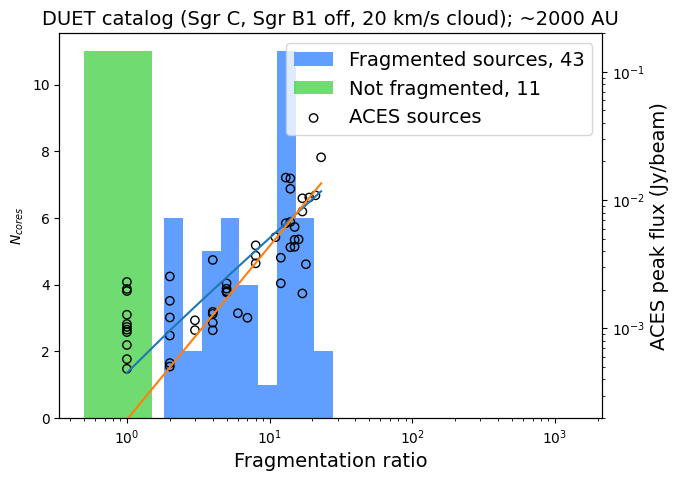

In [137]:
fontsize = 14
fig, ax = plt.subplots(figsize=(7,5))

#bins=np.linspace(-0.5,np.max(occurances_lowres_over1)+0.5, np.max(occurances_lowres_over1)+2)
bins = np.logspace(0,np.log(np.max(occurances_lowres_over1)+0.5), np.max(occurances_lowres_over1)+2)
plt.hist(occurances_lowres_over1, alpha = 1, linewidth = 2, histtype = 'stepfilled', ec = 'blue', bins=bins, 
         label = 'Fragmented sources, '+str(len(occurances_lowres_over1)), color = '#609fff')
plt.hist(occurances_lowres_1, alpha = 0.7, linewidth = 2, histtype = 'stepfilled', bins=np.linspace(0.5,1.5, 2), 
         label = 'Not fragmented, '+str(len(occurances_lowres_1)), color = '#33cc33', ec = 'green')
#plt.hist([number_of_lowres_resolved_out, number_of_lowres_resolved_out_low_conf], alpha = 0.7, linewidth = 2, 
#         histtype = 'stepfilled', color = ['red', 'orange'], 
#         label = ['Resolved out, '+str(len(number_of_lowres_resolved_out)), 'Resolved out, low confidence, '+str(len(number_of_lowres_resolved_out_low_conf))])
#         ec = 'orange', bins=np.linspace(-0.5,0.5, 2), stacked = True, hatch=['/','|'],  

plt.xlabel('Fragmentation ratio', fontsize = fontsize)
plt.ylabel(r'$N_{cores}$')

plt.scatter(np.nan,np.nan, marker = 'o', color = 'k', facecolors='none', edgecolors='k', label = 'ACES sources') 
plt.legend(fontsize = fontsize,)   

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.scatter(occurances_lowres, ACES_cat[ids_ACES]['peak_flux'], marker = 'o', color = 'k', facecolors='none', edgecolors='k')
ax2.plot(occurances_lowres, fit_line, '-', label='Fitted line')

#ax2.scatter(number_of_lowres_resolved_out, arr_resolved_out, marker = 'o', color = 'k', facecolors='none', edgecolors='k')
#ax2.scatter(number_of_lowres_resolved_out_low_conf, arr_resolved_out_low_conf, marker = 'o', color = 'k', facecolors='none', edgecolors='k')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.0002,0.2)
ax2.plot(occurances_lowres, fit_line_power_law, '-', label=f'Fitted power law: $y = {a:.2f}x^{b:.2f}$')
ax2.set_ylabel("ACES peak flux (Jy/beam)",fontsize=14)
plt.title('DUET catalog (Sgr C, Sgr B1 off, 20 km/s cloud); ~2000 AU', fontsize = fontsize)
#plt.savefig('flux_fragmentation.png',dpi=300,bbox_inches='tight')

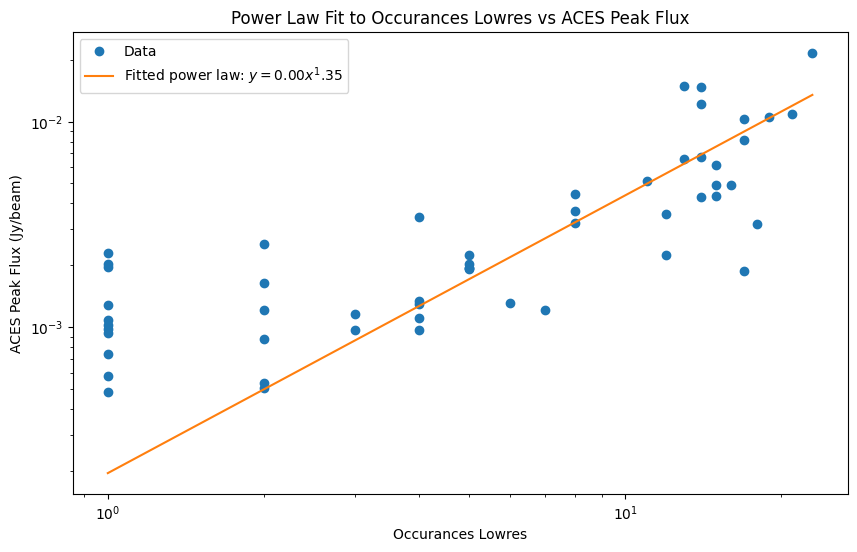

In [127]:
from scipy.optimize import curve_fit

# Define the power law function
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit the power law to the data
popt, pcov = curve_fit(power_law, occurances_lowres, ACES_cat[ids_ACES]['peak_flux'])

# Extract the parameters
a, b = popt

# Generate the fitted line
fit_line_power_law = power_law(occurances_lowres, a, b)

# Plot the original data and the fitted power law
plt.figure(figsize=(10, 6))
plt.plot(occurances_lowres, ACES_cat[ids_ACES]['peak_flux'], 'o', label='Data')
plt.plot(occurances_lowres, fit_line_power_law, '-', label=f'Fitted power law: $y = {a:.2f}x^{b:.2f}$')
plt.xlabel('Occurances Lowres')
plt.ylabel('ACES Peak Flux (Jy/beam)')
plt.legend()
plt.title('Power Law Fit to Occurances Lowres vs ACES Peak Flux')
plt.yscale('log')
plt.xscale('log')
plt.show()

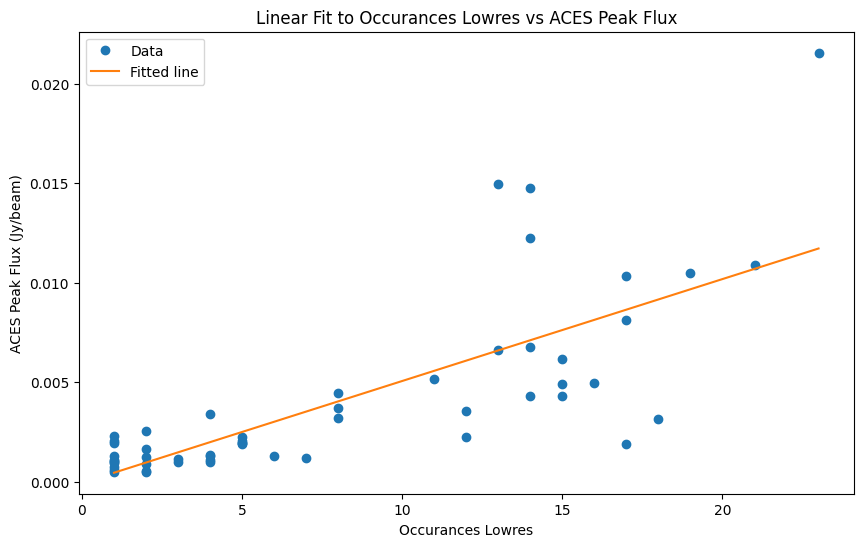

In [ ]:
# Fit a line to (occurances_lowres, ACES_cat[ids_ACES]['peak_flux'])
coefficients = np.polyfit(occurances_lowres, ACES_cat[ids_ACES]['peak_flux'], 1)
fit_line = np.polyval(coefficients, occurances_lowres)

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(occurances_lowres, ACES_cat[ids_ACES]['peak_flux'], 'o', label='Data')
plt.plot(occurances_lowres, fit_line, '-', label='Fitted line')
plt.xlabel('Occurances Lowres')
plt.ylabel('ACES Peak Flux (Jy/beam)')
plt.legend()
plt.title('Linear Fit to Occurances Lowres vs ACES Peak Flux')
plt.show()